**Sources**:

1) Tabtah, F. (2017). Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment. Proceedings of the 1st International Conference on Medical and Health Informatics 2017, pp.1-6. Taichung City, Taiwan, ACM.

2) Thabtah, F. (2017). ASDTests. A mobile app for ASD screening. www.asdtests.com [accessed December 20th, 2017].

3) Thabtah, F. (2017). Machine Learning in Autistic Spectrum Disorder Behavioural Research: A Review. To Appear in Informatics for Health and Social Care Journal. December, 2017 (in press)


**columns**:

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

age - Age of the patient in years

gender - Gender of the patient

ethnicity - Ethnicity of the patient

jaundice - Whether the patient had jaundice at the time of birth

autism - Whether an immediate family member has been diagnosed with autism

contry_of_res - Country of residence of the patient

used_app_before - Whether the patient has undergone a screening test before

result - Score for AQ1-10 screening test

age_desc - Age of the 

relation - Relation of patient who completed the test

Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [83]:
#import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import time as time
import os
from IPython.display import display # Allows the use of display() for DataFrame

#pretty display for notebooks
%matplotlib inline

df1 = pd.read_csv('data/Autism-Adolescent-Data.csv', na_values=['?'])
df2 = pd.read_csv('data/Autism-Adult_Data.csv', na_values=['?'])
df3 = pd.read_csv('data/Autism-Child-Data.csv', na_values=['?'])

# Concatenating df1, df2, and df3 into a single DataFrame
data = pd.concat([df1, df2, df3], ignore_index=True)

# Dropping specified columns
columns_to_drop = ['Unnamed: 0', 'contry_of_res', 'used_app_before', 'age_desc']
data = data.drop(columns=columns_to_drop)

# Dropping duplicate rows
data = data.drop_duplicates()

# Displaying the first few rows of the resulting DataFrame
display(data.head())

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,result,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,15.0,m,Hispanic,yes,yes,6.0,Parent,NO
1,0,0,0,0,0,0,0,0,1,1,15.0,m,Black,no,no,2.0,Relative,NO
2,0,0,0,0,0,0,0,0,1,1,12.0,f,NaN,no,no,2.0,NaN,NO
3,0,1,1,1,1,1,0,1,1,0,14.0,f,White-European,no,no,7.0,Self,YES
4,1,1,1,1,1,1,1,0,0,0,16.0,f,NaN,no,no,7.0,NaN,YES


In [84]:
data.shape 

(1082, 18)

In [85]:
# Number of records where individual's with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

#Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Total number of records
n_records = len(data.index)

#Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

print("Individuals diagonised with ASD: ",n_asd_yes)
print("Individuals not diagonised with ASD: ",n_asd_no)
print("Percentage of individuals diagonised with ASD: ", yes_percent)

Individuals diagonised with ASD:  383
Individuals not diagonised with ASD:  699
Percentage of individuals diagonised with ASD:  35.39741219963031


In [86]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,1076.000000,1082.000000
mean,0.699630,0.479667,0.546211,0.528651,0.585028,0.439002,0.473198,0.600739,0.407579,0.620148,22.104089,5.379852
std,0.458631,0.499817,0.498090,0.499409,0.492945,0.496495,0.499512,0.489973,0.491611,0.485574,16.909674,2.507875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,3.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,21.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 1099
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1_Score   1082 non-null   int64  
 1   A2_Score   1082 non-null   int64  
 2   A3_Score   1082 non-null   int64  
 3   A4_Score   1082 non-null   int64  
 4   A5_Score   1082 non-null   int64  
 5   A6_Score   1082 non-null   int64  
 6   A7_Score   1082 non-null   int64  
 7   A8_Score   1082 non-null   int64  
 8   A9_Score   1082 non-null   int64  
 9   A10_Score  1082 non-null   int64  
 10  age        1076 non-null   float64
 11  gender     1082 non-null   object 
 12  ethnicity  941 non-null    object 
 13  jundice    1082 non-null   object 
 14  austim     1082 non-null   object 
 15  result     1082 non-null   float64
 16  relation   941 non-null    object 
 17  Class/ASD  1082 non-null   object 
dtypes: float64(2), int64(10), object(6)
memory usage: 160.6+ KB


In [88]:
data['gender'].value_counts()

m    611
f    471
Name: gender, dtype: int64

In [89]:
data["relation"].value_counts()

Self                        565
Parent                      294
Relative                     50
Health care professional     23
Others                        8
self                          1
Name: relation, dtype: int64

In [90]:
data['Class/ASD'].value_counts()

NO     699
YES    383
Name: Class/ASD, dtype: int64

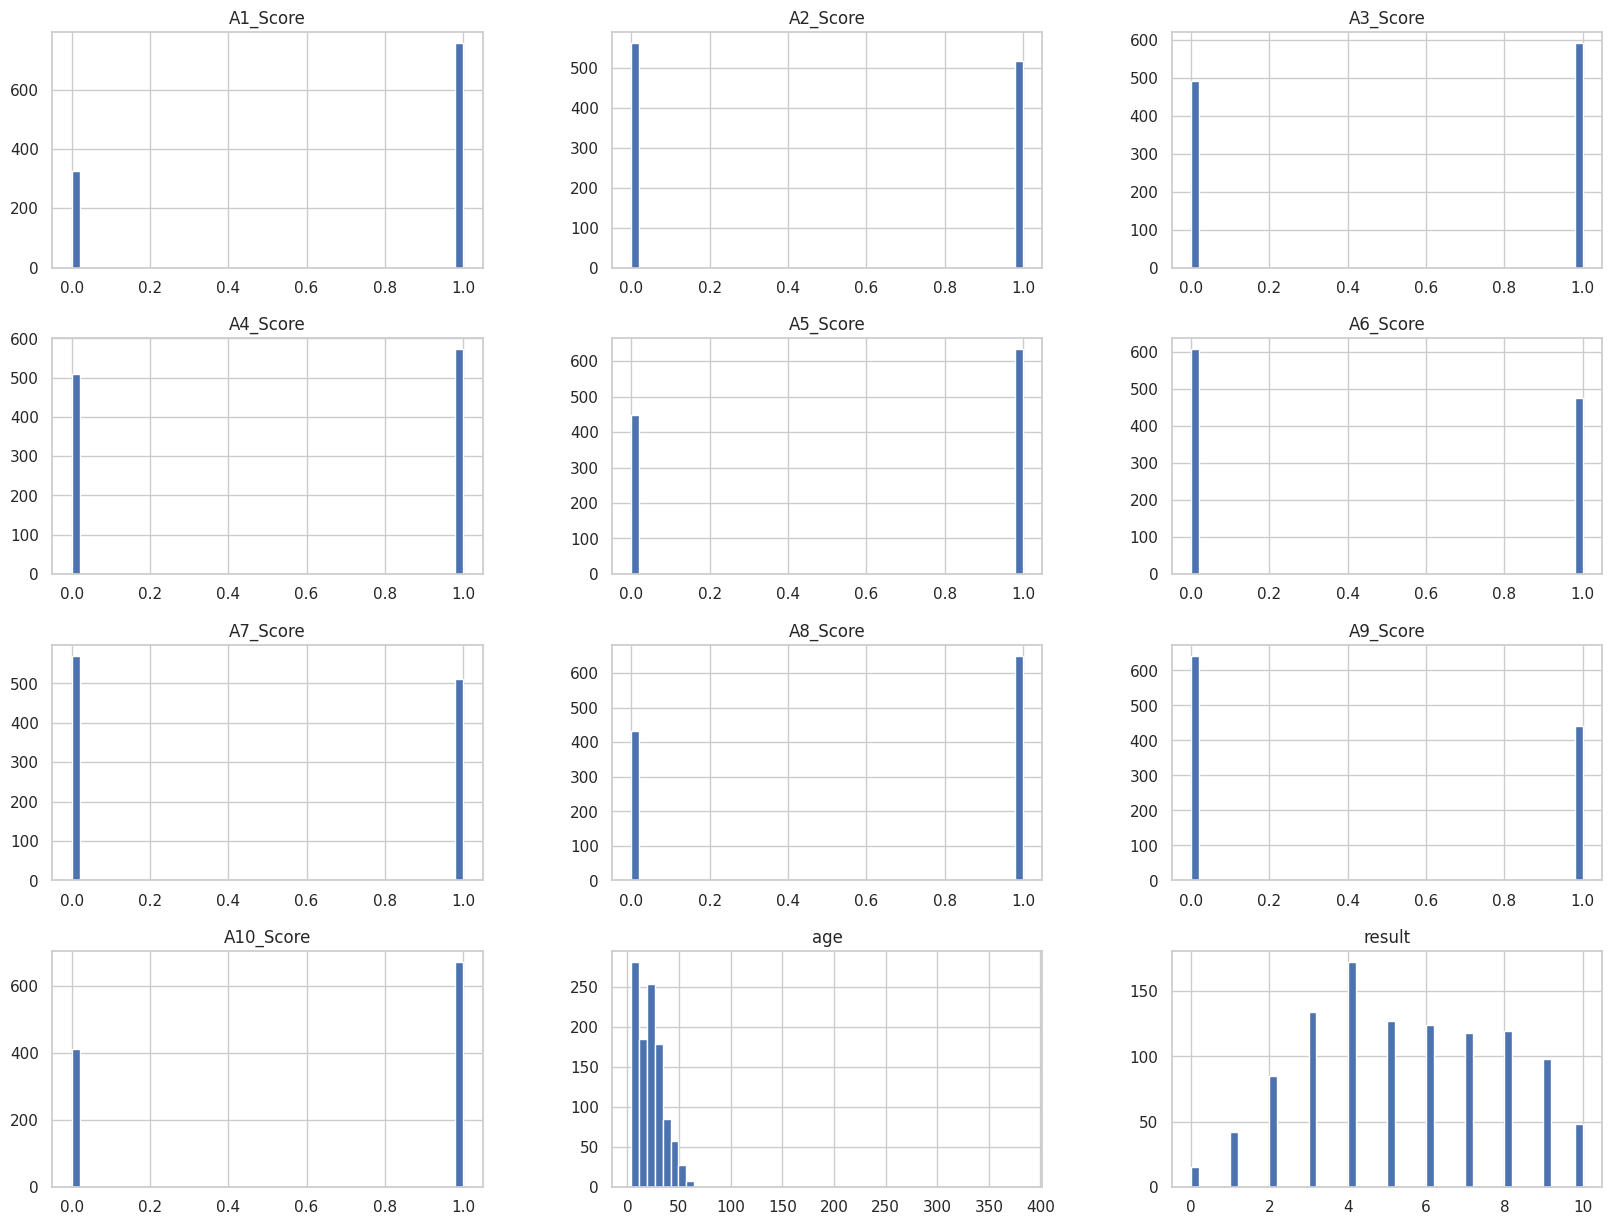

In [91]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [92]:
#since the missing data seems randomly distributed, I go ahead and drop rows with missing data.
#If we could have fill with median values for 'NaN' instead of dropping them, but in this situation that is little complicated as I have lot of categorical colums with 'NaN'.

data.loc[(data['age'].isnull()) |(data['gender'].isnull()) |(data['ethnicity'].isnull()) 
            |(data['jundice'].isnull())|(data['austim'].isnull())|(data['result'].isnull())
            |(data['relation'].isnull())]


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,result,relation,Class/ASD
2,0,0,0,0,0,0,0,0,1,1,12.0,f,NaN,no,no,2.0,NaN,NO
4,1,1,1,1,1,1,1,0,0,0,16.0,f,NaN,no,no,7.0,NaN,YES
5,1,0,0,0,0,1,0,0,1,0,13.0,f,NaN,no,no,3.0,NaN,NO
6,0,0,0,1,1,1,1,1,1,0,16.0,f,NaN,no,no,6.0,NaN,NO
28,1,1,0,0,0,0,1,0,1,0,13.0,m,NaN,no,no,4.0,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,1,1,0,0,0,0,1,0,0,0,9.0,f,NaN,yes,no,3.0,NaN,NO
1052,0,1,1,0,1,1,0,1,0,1,7.0,m,NaN,yes,no,6.0,NaN,NO
1057,0,1,0,1,1,0,1,1,0,1,9.0,m,NaN,yes,no,6.0,NaN,NO
1059,0,1,1,1,1,1,1,1,0,1,7.0,m,NaN,yes,no,8.0,NaN,YES


In [93]:
data = data.dropna(subset=['age', 'gender', 'ethnicity', 'jundice', 'austim', 'result',  'relation'])


len(data)

940

<Axes: xlabel='jundice', ylabel='result'>

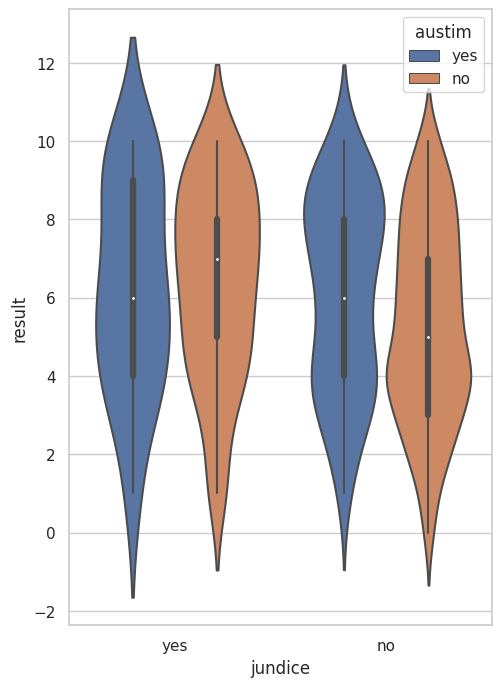

In [94]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'jundice', y = 'result',hue="austim", data = data[0:])

<Axes: xlabel='gender', ylabel='result'>

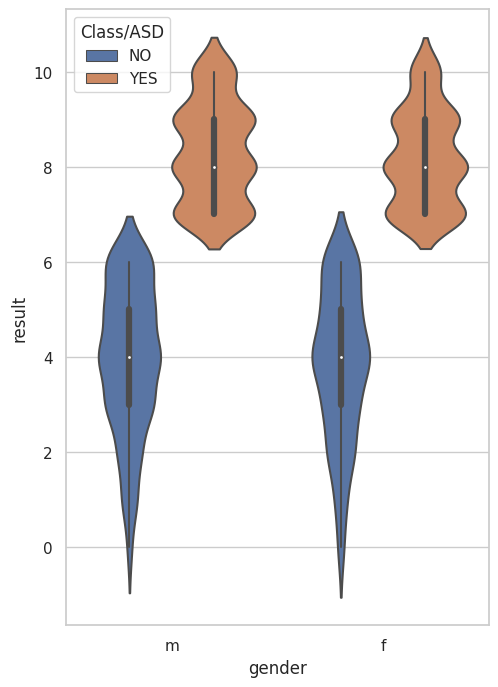

In [95]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'gender', y = 'result',hue="Class/ASD", data = data[0:])

<Axes: xlabel='jundice', ylabel='result'>

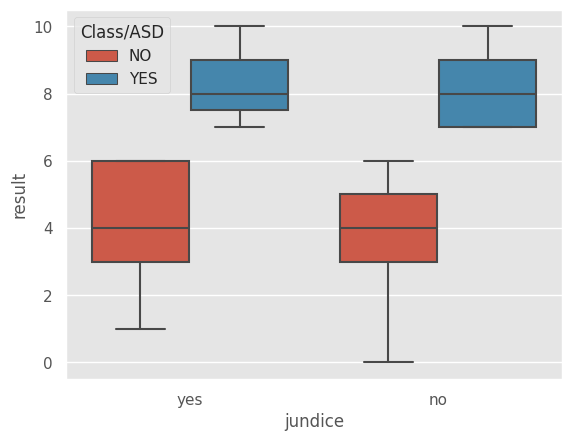

In [96]:
plt.style.use("ggplot")
sns.boxplot(x = 'jundice',y = "result", hue="Class/ASD", data= data)

<Axes: xlabel='gender', ylabel='result'>

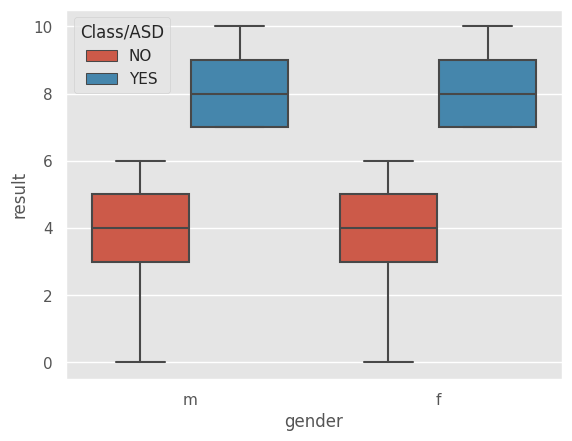

In [97]:
plt.style.use("ggplot")
sns.boxplot(x = 'gender',y = "result", hue="Class/ASD", data= data)

/home/merwan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


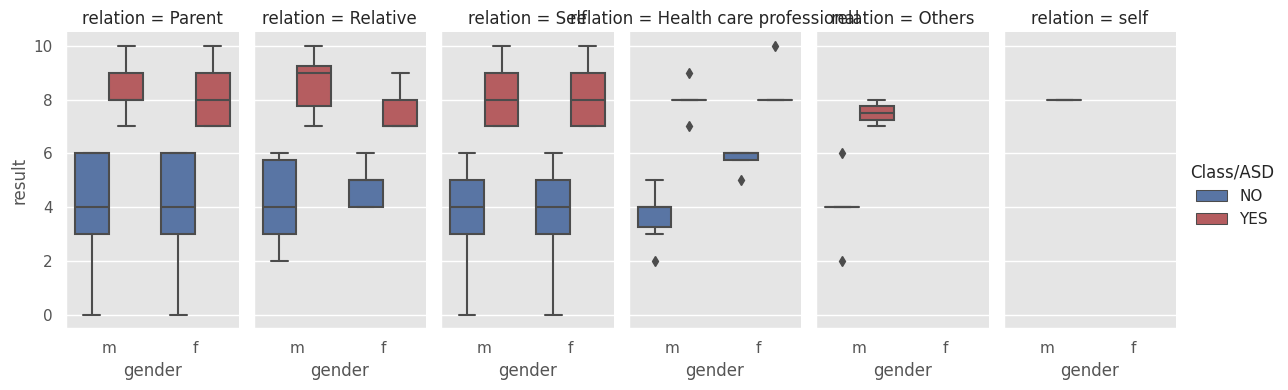

In [98]:
sns.catplot(x="gender", y="result", hue="Class/ASD",
               col="relation", data=data, kind ="box", height=4, aspect=.5, palette={'YES': "r", 'NO': "b"});

/home/merwan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


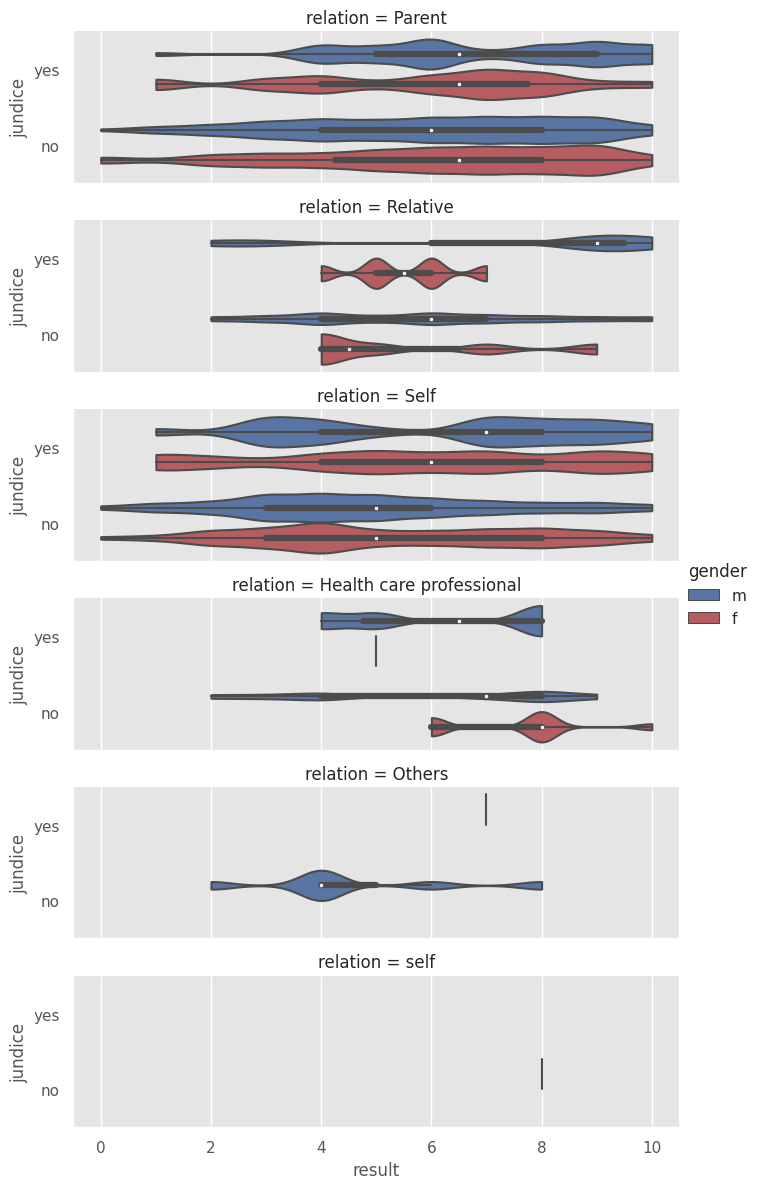

In [99]:
g = sns.catplot(x="result", y="jundice",
                   hue="gender", row="relation",
                   data=data,
                    orient="h", height=2, aspect=3.5, palette={'f': "r", 'm': "b"},
                  kind="violin", dodge=True, cut=0, bw=.2)

In [100]:
data.to_csv("Autism_test_clean.csv",index=False)